In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer, explained_variance_score, r2_score, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.svm import SVR
import seaborn as sns
from scipy.stats import skew
from sklearn.cross_validation import cross_val_score, train_test_split

%matplotlib inline

/Users/Tsolmon/anaconda3/envs/venv/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
my_dataset = pd.read_csv('main_data.csv')

In [3]:
print("Keys of my_dataset: \n{}".format(my_dataset.keys()))

Keys of my_dataset: 
Index(['Unnamed: 0', 'g_energy', 'temp_high', 'temp_avg', 'temp_low',
       'dew_high', 'dew_avg', 'dew_low', 'humid_high', 'humid_avg',
       'humid_low', 'press_high', 'press_avg', 'press_low', 'visib_high',
       'visib_avg', 'visib_low', 'wind_high', 'wind_avg', 'precip_sum', 'rain',
       'snow', 'fog', 'thunderstorm', 'hail'],
      dtype='object')


In [4]:
my_dataset.shape

(731, 25)

In [5]:
print(my_dataset.head())
print(my_dataset.shape)
print(my_dataset.dtypes)

   Unnamed: 0  g_energy  temp_high  temp_avg  temp_low  dew_high  dew_avg  \
0  2013-12-24     304.0        -14       -18       -22       -17      -21   
1  2013-12-25     270.0        -15       -23       -31       -17      -24   
2  2013-12-26     410.0        -18       -26       -33       -23      -29   
3  2013-12-27     174.0        -23       -29       -35       -27      -33   
4  2013-12-28     400.0        -18       -26       -33       -23      -31   

   dew_low  humid_high  humid_avg  ...   visib_avg  visib_low  wind_high  \
0      -27          85         79  ...           6          0         14   
1      -35          85         77  ...           9          2         14   
2      -36          84         74  ...           4          2         11   
3      -39          77         70  ...           3          0          6   
4      -38          78         72  ...           3          0          6   

   wind_avg  precip_sum  rain  snow  fog  thunderstorm  hail  
0         5      

In [6]:
my_dataset = my_dataset[my_dataset.g_energy < 40000]

In [7]:
data = my_dataset.drop('Unnamed: 0', axis=1)
data.g_energy = np.log1p(data.g_energy)
data.press_high = np.log1p(data.press_high)
data.press_avg = np.log1p(data.press_avg)
data.press_low = np.log1p(data.press_low)
data[:2]

,g_energy,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humid_high,humid_avg,humid_low,...,visib_avg,visib_low,wind_high,wind_avg,precip_sum,rain,snow,fog,thunderstorm,hail
0,5.720312,-14,-18,-22,-17,-21,-27,85,79,60,...,6,0,14,5,1.02,0,1,0,0,0
1,5.602119,-15,-23,-31,-17,-24,-35,85,77,50,...,9,2,14,6,2.29,0,1,0,0,0


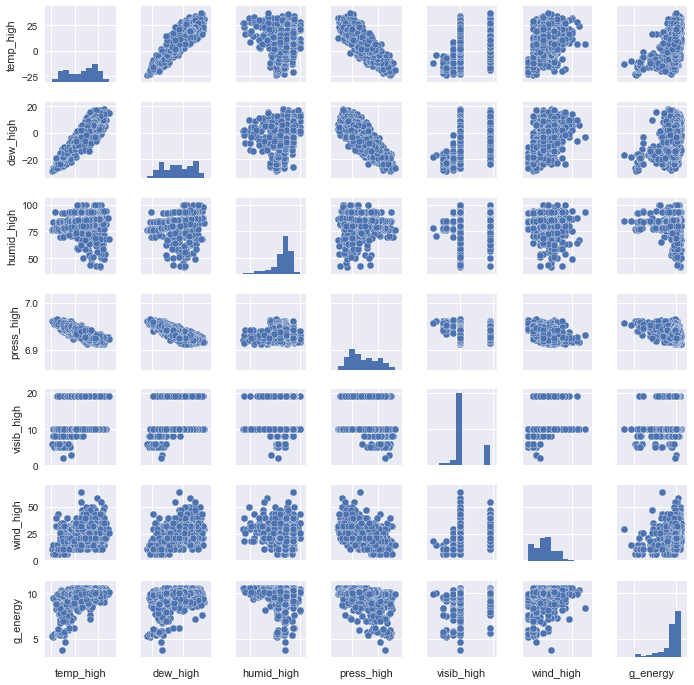

In [8]:
p = sns.pairplot(data[['temp_high','dew_high','humid_high','press_high','visib_high','wind_high','g_energy']], palette='afmhot',size=1.4)
p.set(xticklabels=[])

In [9]:
y = data.g_energy
data.drop('g_energy', axis=1)
y[:5]

0    5.720312
1    5.602119
2    6.018593
3    5.164786
4    5.993961
Name: g_energy, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=0)

In [11]:
print("X_train.shape: {}".format(X_train.shape)) 
print("X_test.shape: {}".format(X_test.shape)) 
# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train_scaled.shape: {}".format(X_train_scaled.shape))
print("X_test_scaled.shape: {}".format(X_test_scaled.shape))
# polynominal data
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train_poly.shape: {}".format(X_train_poly.shape))
print("X_test_poly.shape: {}".format(X_test_poly.shape)) 

X_train.shape: (515, 24)
X_test.shape: (172, 24)
X_train_scaled.shape: (515, 24)
X_test_scaled.shape: (172, 24)
X_train_poly.shape: (515, 325)
X_test_poly.shape: (172, 325)


In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train) 
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.994
Score with interactions: 0.997


In [13]:
scores = cross_val_score(ridge, X_train_poly, y_train, cv=5) 
print("Ridge regressor Cross-validation scores: {}".format(scores))

Ridge regressor Cross-validation scores: [ 0.99403253  0.99643693  0.99615494  0.99318158  0.99655089]


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train) 
print("RandomForestRegressor score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train) 
print("RandomForestRegressor score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

RandomForestRegressor score without interactions: 0.999
RandomForestRegressor score with interactions: 0.999


In [15]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train_poly, y_train, scoring = scorer, cv = 10))
    return(rmse)
def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test_poly, y_test, scoring = scorer, cv = 10))
    return(rmse)

Ridge regressor with RMSE on Training set : 0.0704445794559
Ridge regressor with RMSE on Test set : 0.104493026332


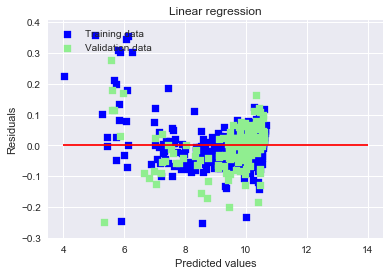

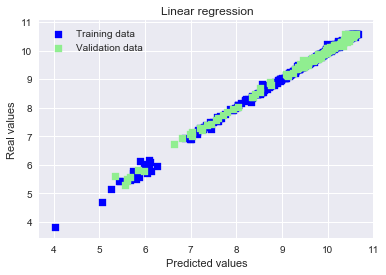

In [16]:
# Look at predictions on training and validation set
print("Ridge regressor with RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge regressor with RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_pred = ridge.predict(X_train_poly)
y_test_pred = ridge.predict(X_test_poly)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 4.0, xmax = 14.0, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
#plt.plot([4.0, 14.0], [4.0, 14.0], c = "red")
plt.show()

RandomForestRegressor with RMSE on Training set : 0.0679671892405
RandomForestRegressor with RMSE on Test set : 0.100331420318


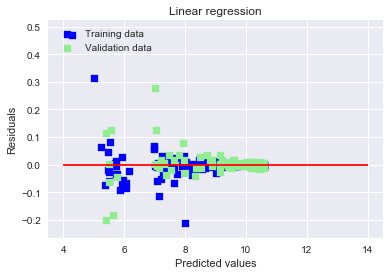

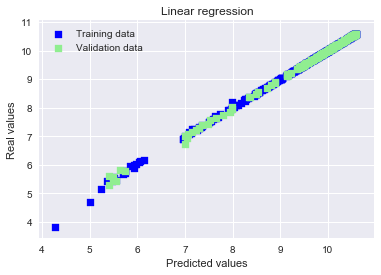

In [17]:
# Look at predictions on training and validation set
print("RandomForestRegressor with RMSE on Training set :", rmse_cv_train(rf).mean())
print("RandomForestRegressor with RMSE on Test set :", rmse_cv_test(rf).mean())
y_train_pred = rf.predict(X_train_poly)
y_test_pred = rf.predict(X_test_poly)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 4.0, xmax = 14.0, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
#plt.plot([4.0, 14.0], [4.0, 14.0], c = "red")
plt.show()

In [18]:
scores = cross_val_score(rf, X_train_poly, y_train, cv=5) 
print("RandomForestRegressor Cross-validation scores: {}".format(scores))

RandomForestRegressor Cross-validation scores: [ 0.99723116  0.99788751  0.99792826  0.96878841  0.99897675]


In [26]:
# Feature selection
from sklearn.feature_selection import SelectFromModel
#RidgeRegressor
model = SelectFromModel(ridge, prefit=True)
X_new_train_r = model.transform(X_train_poly)
X_new_test_r = model.transform(X_test_poly)
print("Ridge regressor Selected features from test set: {}".format(X_new_test_r.shape))
print("Ridge regressor Selected features from train set: {}".format(X_new_train_r.shape))
print("Ridge model selected features: {}".format(model.get_support()))
# RandomForestRegressor
model = SelectFromModel(rf, prefit=True)
X_new_train = model.transform(X_train_poly)
X_new_test = model.transform(X_test_poly)
print("RandomForestRegressor Selected features from test set: {}".format(X_new_test.shape))
print("RandomForestRegressor Selected features from train set: {}".format(X_new_train.shape))

Ridge regressor Selected features from test set: (172, 64)
Ridge regressor Selected features from train set: (515, 64)
Ridge model selected features: [False  True  True  True  True False False False  True  True  True  True
  True  True  True  True False  True False False False  True False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False  True False False False  True
  True False False False False False False False False False False False
 False False False False False False False False False  True  True False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False Fals

In [22]:
ridge_l1 = Ridge().fit(X_new_train_r, y_train)
print("Ridge regressor selected feature score: {:.3f}".format(ridge_l1.score(X_new_test_r, y_test)))
rf_l1 = RandomForestRegressor(n_estimators=100).fit(X_new_train, y_train) 
print("RandomForestRegressor selected feature Score: {:.3f}".format(rf_l1.score(X_new_test, y_test)))

Ridge regressor selected feature score: 0.997
RandomForestRegressor selected feature Score: 1.000


In [23]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train_poly, y_train)
y_lin = svr_lin.fit(X_train_poly, y_train)
y_poly = svr_poly.fit(X_train_poly, y_train)

In [24]:
print("SVR kernel-rbf selected feature Score with interactions: {:.3f}".format(y_rbf.score(X_test_poly, y_test)))
print("SVR kernel-linear selected feature Score with interactions: {:.3f}".format(y_lin.score(X_test_poly, y_test)))
print("SVR kernel-poly selected feature Score with interactions: {:.3f}".format(y_poly.score(X_test_poly, y_test)))

SVR kernel-rbf selected feature Score with interactions: 0.964
SVR kernel-linear selected feature Score with interactions: 0.996
SVR kernel-poly selected feature Score with interactions: 0.981


In [49]:
#SVR
model = SelectFromModel(y_rbf, prefit=True)
X_new_train_svr_rbf = model.transform(X_train_poly)
X_new_test_svr_rbf = model.transform(X_test_poly)
print("Ridge regressor Selected features from test set: {}".format(X_new_test_svr_rbf.shape))
print("Ridge regressor Selected features from train set: {}".format(X_new_train_svr_rbf.shape))

ValueError: The underlying estimator SVR has no `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to SelectFromModel or call fit before calling transform.

In [48]:
#print("rf_l1.coef_: {}".format(rf_l1.coef_)) 
#print("rf_l1.intercept_: {}".format(rf_l1.intercept_))

# R^2 (coefficient of determination) regression score function.
ridge_predicted_values = ridge_l1.predict(X_new_test_r)
print("Ridge regressor selected feature R^2 regression score: {:.3f}".format(r2_score(y_test, ridge_predicted_values)))
print("Ridge regressor selected feature Mean squared log error regression score: {:.3f}".format(mean_squared_log_error(y_test, ridge_predicted_values)))

rf_predicted_values = rf_l1.predict(X_new_test)
print("Random Forest regressor selected feature R^2 regression score: {:.3f}".format(r2_score(y_test, rf_predicted_values)))
print("Random Forest regressor selected feature Mean squared log error regression score: {:.3f}".format(mean_squared_log_error(y_test, rf_predicted_values)))


Ridge regressor selected feature R^2 regression score: 0.997
Ridge regressor selected feature Mean squared log error regression score: 0.000
Random Forest regressor selected feature R^2 regression score: 1.000
Random Forest regressor selected feature Mean squared log error regression score: 0.000


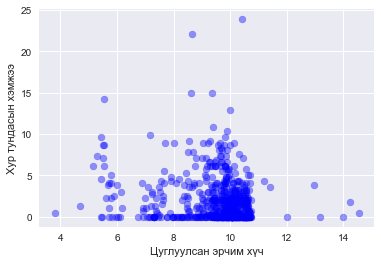

In [19]:
#data[['temp_high','dew_high','humid_high','press_high','visib_high','wind_high','g_energy']
x = data['g_energy']
y = data['precip_sum']
plt.scatter(x, y, color='b', alpha=.4)
plt.ylabel('Хур тундасын хэмжээ')
plt.xlabel('Цуглуулсан эрчим хүч')
plt.show()

# 2017 оны 6 сарын нэгнээс 7 сарын нэгний хоорондох машин сургалтанд ашиглаагүй өгөгдлийг шалгах хэсэг

In [25]:
# 1 сарын цаг агаарын өгөгдлийг бэлдэх
my_test_dataset = pd.read_csv('main_data_june.csv')
print("Keys of my_dataset: \n{}".format(my_test_dataset.keys()))

Keys of my_dataset: 
Index(['Unnamed: 0', 'g_energy', 'temp_high', 'temp_avg', 'temp_low',
       'dew_high', 'dew_avg', 'dew_low', 'humid_high', 'humid_avg',
       'humid_low', 'press_high', 'press_avg', 'press_low', 'visib_high',
       'visib_avg', 'visib_low', 'wind_high', 'wind_avg', 'precip_sum', 'rain',
       'snow', 'fog', 'thunderstorm', 'hail'],
      dtype='object')


In [26]:
print(my_test_dataset.head())
print(my_test_dataset.shape)
print(my_test_dataset.dtypes)

   Unnamed: 0  g_energy  temp_high  temp_avg  temp_low  dew_high  dew_avg  \
0  2017-06-01      5150         18        13         9         6        0   
1  2017-06-02     13416         18        11         5         3       -3   
2  2017-06-03     11624         26        16         6         0       -4   
3  2017-06-04     12373         26        19        12         9        2   
4  2017-06-05     11999         27        17         7         4       -1   

   dew_low  humid_high  humid_avg  ...   visib_avg  visib_low  wind_high  \
0      -11          67         42  ...          10         10         35   
1       -6          87         42  ...          10         10         29   
2       -8          65         28  ...          10         10         32   
3       -6          77         35  ...          10         10         40   
4       -6          62         35  ...          10          8         50   

   wind_avg  precip_sum  rain  snow  fog  thunderstorm  hail  
0        14      

In [27]:
test_data = my_test_dataset.drop('Unnamed: 0', axis=1)
test_data.g_energy = np.log1p(test_data.g_energy)
test_data.press_high = np.log1p(test_data.press_high)
test_data.press_avg = np.log1p(test_data.press_avg)
test_data.press_low = np.log1p(test_data.press_low)
test_data[:2]

,g_energy,temp_high,temp_avg,temp_low,dew_high,dew_avg,dew_low,humid_high,humid_avg,humid_low,...,visib_avg,visib_low,wind_high,wind_avg,precip_sum,rain,snow,fog,thunderstorm,hail
0,8.546946,18,13,9,6,0,-11,67,42,6,...,10,10,35,14,0.0,1,0,0,0,0
1,9.504278,18,11,5,3,-3,-6,87,42,11,...,10,10,29,13,0.0,0,0,0,0,0


In [28]:
test_y = test_data.g_energy
test_data.drop('g_energy', axis=1)
test_y = np.expm1(test_y)
test_y.to_csv('test_y_june.csv', sep=",")
test_y[:5]

0     5150.0
1    13416.0
2    11624.0
3    12373.0
4    11999.0
Name: g_energy, dtype: float64

In [29]:
# rescale data
#scaler = MinMaxScaler()
test_data_scaled = scaler.transform(test_data)
print("test_data_scaled.shape: {}".format(test_data_scaled.shape))
# polynominal data
test_data_poly = poly.transform(test_data_scaled)
print("test_data_poly.shape: {}".format(test_data_poly.shape))

test_data_scaled.shape: (31, 24)
test_data_poly.shape: (31, 325)


In [37]:
# ridge regression model prediction
test_y_prediction = ridge.predict(test_data_poly)
test_y_prediction[:5]
test_prediction = pd.DataFrame(test_y_prediction)
test_prediction = np.expm1(test_prediction)
test_prediction.to_csv('test_prediction_ridge_june.csv', sep=",")
test_prediction[:5]

,0
0,5656.765981
1,13088.170865
2,12525.189365
3,12909.532130
4,13156.901090


In [38]:
# randomforest regression model prediction
test_y_prediction = rf.predict(test_data_poly)
test_y_prediction[:5]
test_prediction = pd.DataFrame(test_y_prediction)
test_prediction = np.expm1(test_prediction)
test_prediction.to_csv('test_prediction_randomforest_june.csv', sep=",")
test_prediction[:5]

,0
0,4995.434305
1,13364.587634
2,11635.546871
3,12447.585041
4,12001.909429


In [39]:
# support vector regression model prediction
y_rbf_prediction = svr_rbf.predict(test_data_poly)
y_lin_prediction = svr_lin.predict(test_data_poly)
y_poly_prediction = svr_poly.predict(test_data_poly)

test_prediction = pd.DataFrame(y_rbf_prediction)
test_prediction = np.expm1(test_prediction)
test_prediction.to_csv('test_prediction_svm_rbf_june.csv', sep=",")

test_prediction = pd.DataFrame(y_lin_prediction)
test_prediction = np.expm1(test_prediction)
test_prediction.to_csv('test_prediction_svm_lin_june.csv', sep=",")

test_prediction = pd.DataFrame(y_poly_prediction)
test_prediction = np.expm1(test_prediction)
test_prediction.to_csv('test_prediction_svm_poly_june.csv', sep=",")